In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

2024-01-26 13:57:56.295328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/6f/cmgdlrnj78g5r1pl2dzz3y_r0000gn/T/ipykernel_63243/1337086538.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
import pandas as pd

file_path = '/Users/elmojuanara/Desktop/for_paper/virtual observation/rakata_1/15min/ciwandan/allscenarios.xlsx'  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

In [3]:
print(df.head())

       time  scenario_1  scenario_2  scenario_3  scenario_4  scenario_5  \
0  0.014737    10.64239    10.64239    10.64239    10.64239    10.64239   
1  0.029474    10.64239    10.64239    10.64239    10.64239    10.64239   
2  0.044212    10.64239    10.64239    10.64239    10.64239    10.64239   
3  0.058949    10.64239    10.64239    10.64239    10.64239    10.64239   
4  0.073686    10.64239    10.64239    10.64239    10.64239    10.64239   

   scenario_6  scenario_7  scenario_8  
0    10.64239    10.64239    10.64239  
1    10.64239    10.64239    10.64239  
2    10.64239    10.64239    10.64239  
3    10.64239    10.64239    10.64239  
4    10.64239    10.64239    10.64239  


In [4]:
df.shape

(8143, 9)

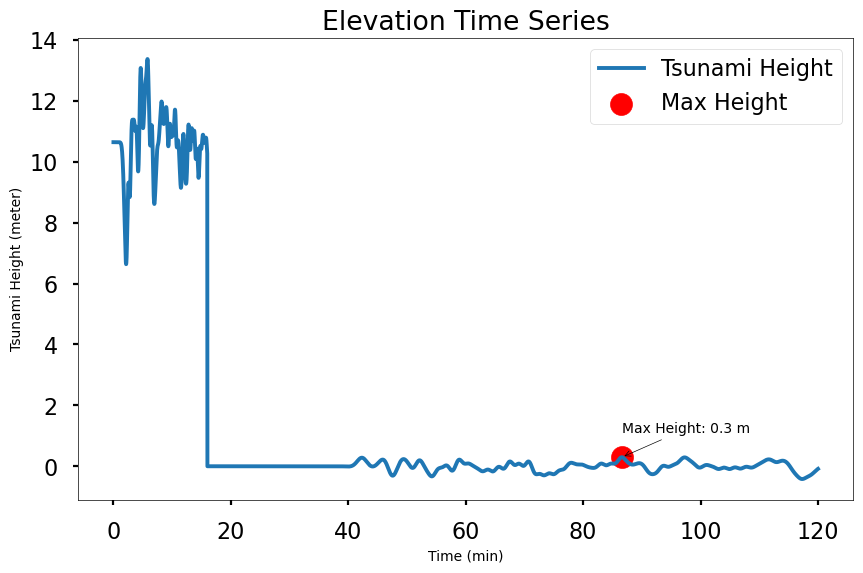

Maximum Tsunami Height between 16 and 120: 0.3 meters, at time 86.5991212


In [5]:
# Plot data time series
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['scenario_5'], label='Tsunami Height')
plt.xlabel('Time (min)', color='black')
plt.ylabel('Tsunami Height (meter)', color='black')
plt.title('Elevation Time Series')
plt.grid(False)  # Nonaktifkan grid
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')  # Atur latar belakang putih
plt.legend()

# Atur warna frame sumbu x dan y
plt.gca().spines['bottom'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['left'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['top'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['right'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['bottom'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['left'].set_linewidth(0.5)     # Ketebalan frame sumbu y
plt.gca().spines['top'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['right'].set_linewidth(0.5)     # Ketebalan frame sumbu y

# Mencari maksimum ketinggian tsunami di rentang waktu 3000-4000
start_time = 16
end_time = 120

filtered_data = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
max_height_within_range = filtered_data['scenario_5'].max()
max_height_within_range_rounded = round(max_height_within_range, 2)  # Pembulatan hingga 2 desimal
max_time_within_range = filtered_data.loc[filtered_data['scenario_5'].idxmax(), 'time']

# Menambahkan notasi pada plot untuk nilai maksimum ketinggian tsunami di rentang waktu tersebut
plt.scatter(max_time_within_range, max_height_within_range, color='red', label='Max Height', s=250)
plt.annotate(f'Max Height: {max_height_within_range_rounded} m', xy=(max_time_within_range, max_height_within_range),
             xytext=(max_time_within_range + 0.05, max_height_within_range + 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan nilai maksimum ketinggian tsunami di rentang waktu tersebut
print(f"Maximum Tsunami Height between {start_time} and {end_time}: {max_height_within_range_rounded} meters, at time {max_time_within_range}")

In [6]:
#create a new dataframe with only the eta1 column
data = df.filter(['scenario_5'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .134)

training_data_len

1092

In [7]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.80203621],
       [0.80203621],
       [0.80203621],
       ...,
       [0.02397865],
       [0.02411278],
       [0.02424401]])

In [8]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(6, len(train_data)):
    x_train.append(train_data[i-6:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 6:
        print(x_train)
        print(y_train)
        print()

[array([0.80203621, 0.80203621, 0.80203621, 0.80203621, 0.80203621,
       0.80203621])]
[0.802036213038173]



In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1086, 6, 1)

In [11]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
1086/1086 [==============================] - 55s 21ms/step - loss: 0.0059
Epoch 2/15
1086/1086 [==============================] - 29s 27ms/step - loss: 0.0025
Epoch 3/15
1086/1086 [==============================] - 30s 27ms/step - loss: 0.0021
Epoch 4/15
 138/1086 [==>...........................] - ETA: 28s - loss: 1.8152e-04

In [ ]:
#create the testing data set
#create a new array containing scaled values from index 212 to 272
test_data = scaled_data[training_data_len - 6: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(6, len(test_data)):
    x_test.append(test_data[i-6:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

max_height_within_range = valid['Predictions'].max()
max_index = valid['Predictions'].idxmax()

# Membulatkan nilai max_height_within_range menjadi 2 angka di belakang koma
max_height_formatted = "{:.2f}".format(max_height_within_range)

#visualize the data
plt.figure(figsize=(12,7))
plt.title('Scenario 5, waveform window 15 mins')
plt.xlabel('Time(s)', fontsize=18)
plt.ylabel('Elevation(m)', fontsize=18)
plt.plot(train['scenario_5'])
plt.plot(valid[['scenario_5', 'Predictions']])
plt.grid(False)  # Nonaktifkan grid
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')  # Atur latar belakang putih
plt.legend(['Rakata_1 input', 'Validation', 'Coastal gauge pred'], loc='upper right')
plt.scatter(max_index, max_height_within_range, color='red', s=300)  # Mengatur ukuran titik scatter

# Atur warna frame sumbu x dan y
plt.gca().spines['bottom'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['left'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['top'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['right'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['bottom'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['left'].set_linewidth(0.5)     # Ketebalan frame sumbu y
plt.gca().spines['top'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['right'].set_linewidth(0.5)     # Ketebalan frame sumbu y


# Menggunakan nilai yang sudah diformat dalam fungsi annotate
plt.annotate(f'Max Height: {max_height_formatted} m', xy=(max_time_within_range, max_height_within_range),
             xytext=(max_time_within_range + 2800, max_height_within_range + 1))
plt.savefig('waveform_prediction_sc5_rakata1_ciwandan.png')  # Menyimpan plot dengan nama file 'waveform_prediction_plot.png'
plt.show()

# Menampilkan nilai maksimum ketinggian tsunami di rentang waktu tersebut
print(f"Maximum Tsunami Height between {start_time} and {end_time}: {max_height_within_range} meters, at time {max_time_within_range}")

In [ ]:
#show the valid and predicted prices
valid